In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -Uqq fastai
zip_path = "/content/drive/MyDrive/colab_cifake/archive.zip"


In [4]:
import zipfile
import os

extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete. Files are now in:", extract_path)




✅ Extraction complete. Files are now in: /content/dataset


In [5]:
import os

for root, dirs, files in os.walk(extract_path):
    print(f"In directory: {root}")
    for file in files[:10]:  # İlk 10 dosyayı göster
        print("  -", file)
    break



In directory: /content/dataset


In [6]:
#A.1.1. Inspect the data layout
for root, dirs, files in os.walk(extract_path):
    print(f"\n📁 Klasör: {root}")
    if dirs:
        print("  📂 Alt klasörler:", dirs)
    if files:
        print("  📄 Dosyalar:", files[:5])




📁 Klasör: /content/dataset
  📂 Alt klasörler: ['test', 'train']

📁 Klasör: /content/dataset/test
  📂 Alt klasörler: ['REAL', 'FAKE']

📁 Klasör: /content/dataset/test/REAL
  📄 Dosyalar: ['0538 (3).jpg', '0865 (2).jpg', '0132 (5).jpg', '0935.jpg', '0907 (9).jpg']

📁 Klasör: /content/dataset/test/FAKE
  📄 Dosyalar: ['105 (9).jpg', '453 (8).jpg', '314 (7).jpg', '64 (8).jpg', '756 (4).jpg']

📁 Klasör: /content/dataset/train
  📂 Alt klasörler: ['REAL', 'FAKE']

📁 Klasör: /content/dataset/train/REAL
  📄 Dosyalar: ['2949 (9).jpg', '2536 (3).jpg', '0538 (3).jpg', '3260 (3).jpg', '1673 (5).jpg']

📁 Klasör: /content/dataset/train/FAKE
  📄 Dosyalar: ['2949 (9).jpg', '2536 (3).jpg', '3260 (3).jpg', '1673 (5).jpg', '2776 (6).jpg']


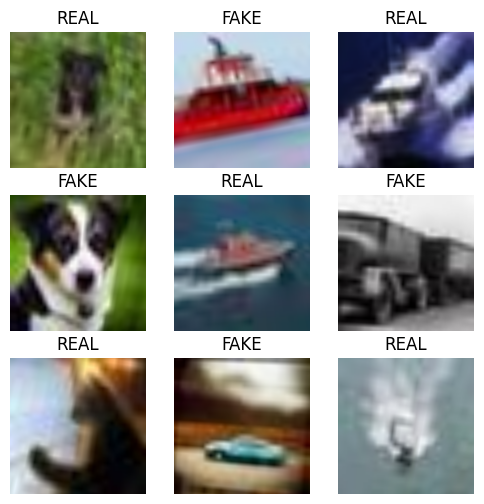

In [7]:

from fastai.vision.all import *


train_path = Path("/content/dataset/train")

dblock = DataBlock(
    #A.2.1 Define the blocks:
    blocks=(ImageBlock, CategoryBlock),
    #A.2.2 — Define the means of getting data into DataBlock:
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    #A.2.3 — Define how to get the attributes
    get_y=parent_label,
    #A.2.4 — Define data transformations
   item_tfms=Resize(256),                  # Presizing (item-level)
    batch_tfms=aug_transforms()             # Augmentations (batch-level)
)
# Create a DataLoaders object from the DataBlock, with a batch size of 32
dls = dblock.dataloaders(train_path, bs=32)
# Display 9 sample images from a single batch to visually verify labels and image transformations
#A.3.1 Show  batch
# The labels (FAKE and REAL) are visually confirmed via show_batch()
#A.3.2 Check the labels
dls.show_batch(max_n=9, figsize=(6,6))



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.265255,0.199013,0.922350,05:30


epoch,train_loss,valid_loss,accuracy,time
0,0.159193,0.105664,0.961700,06:54
1,0.100156,0.068198,0.975150,06:50
2,0.069197,0.053788,0.979200,06:51


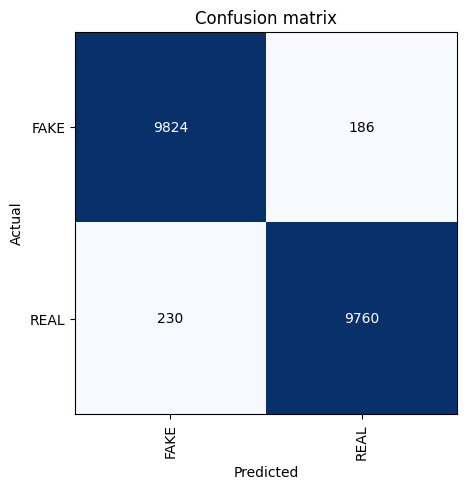

In [8]:
# Create a CNN learner using ResNet18 and accuracy as evaluation metric
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Fine-tune the pretrained ResNet18 model on our dataset for 3 epochs
# This serves as the benchmark model for later comparison
learn.fine_tune(3)

# Interpret model predictions with a confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



In [9]:
learn.export('resnet18-benchmark.pkl')


In [8]:
from google.colab import drive
drive.mount('/content/drive')
from fastai.vision.all import load_learner

learn = load_learner("/content/drive/MyDrive/MyDrive colab_cifake/resnet18-benchmark.pkl")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [12]:
from google.colab import files
files.download('resnet18-benchmark.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
for name, param in learn.model.named_parameters():
    print(f"{name}: {param.shape}")


0.0.weight: torch.Size([64, 3, 7, 7])
0.1.weight: torch.Size([64])
0.1.bias: torch.Size([64])
0.4.0.conv1.weight: torch.Size([64, 64, 3, 3])
0.4.0.bn1.weight: torch.Size([64])
0.4.0.bn1.bias: torch.Size([64])
0.4.0.conv2.weight: torch.Size([64, 64, 3, 3])
0.4.0.bn2.weight: torch.Size([64])
0.4.0.bn2.bias: torch.Size([64])
0.4.1.conv1.weight: torch.Size([64, 64, 3, 3])
0.4.1.bn1.weight: torch.Size([64])
0.4.1.bn1.bias: torch.Size([64])
0.4.1.conv2.weight: torch.Size([64, 64, 3, 3])
0.4.1.bn2.weight: torch.Size([64])
0.4.1.bn2.bias: torch.Size([64])
0.5.0.conv1.weight: torch.Size([128, 64, 3, 3])
0.5.0.bn1.weight: torch.Size([128])
0.5.0.bn1.bias: torch.Size([128])
0.5.0.conv2.weight: torch.Size([128, 128, 3, 3])
0.5.0.bn2.weight: torch.Size([128])
0.5.0.bn2.bias: torch.Size([128])
0.5.0.downsample.0.weight: torch.Size([128, 64, 1, 1])
0.5.0.downsample.1.weight: torch.Size([128])
0.5.0.downsample.1.bias: torch.Size([128])
0.5.1.conv1.weight: torch.Size([128, 128, 3, 3])
0.5.1.bn1.weight:

In [14]:
first_weight = list(learn.model.parameters())[0]
print(first_weight.shape)
print(first_weight)



torch.Size([64, 3, 7, 7])
Parameter containing:
tensor([[[[-1.0691e-02, -6.2954e-03, -1.9223e-03,  ...,  5.6458e-02,
            1.6976e-02, -1.2771e-02],
          [ 1.0845e-02,  9.4070e-03, -1.0995e-01,  ..., -2.7119e-01,
           -1.2906e-01,  3.6957e-03],
          [-7.1828e-03,  5.8937e-02,  2.9524e-01,  ...,  5.1930e-01,
            2.5609e-01,  6.3466e-02],
          ...,
          [-2.7798e-02,  1.5854e-02,  7.2395e-02,  ..., -3.3292e-01,
           -4.2055e-01, -2.5782e-01],
          [ 3.0331e-02,  4.0763e-02,  6.2647e-02,  ...,  4.1340e-01,
            3.9320e-01,  1.6582e-01],
          [-1.4008e-02, -3.8645e-03, -2.4254e-02,  ..., -1.5089e-01,
           -8.2397e-02, -5.9645e-03]],

         [[-1.2010e-02, -2.7128e-02, -3.5081e-02,  ...,  3.2124e-02,
            3.4956e-04, -2.6006e-02],
          [ 4.5111e-02,  3.3132e-02, -1.0488e-01,  ..., -3.1271e-01,
           -1.6069e-01, -1.5092e-03],
          [-1.4112e-03,  9.7895e-02,  4.0149e-01,  ...,  7.0722e-01,
          

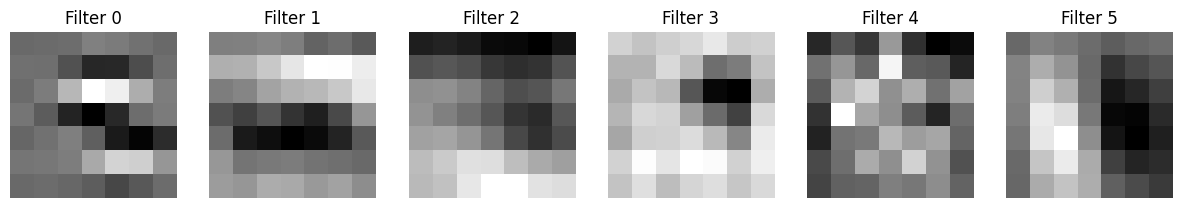

In [15]:
import matplotlib.pyplot as plt

# İlk ağırlık katmanını al
first_conv_weights = list(learn.model.parameters())[0].detach().cpu()

# İlk 6 filtreyi çiz
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axes[i].imshow(first_conv_weights[i][0], cmap='gray')  # 1. kanal (R) gösteriliyor
    axes[i].set_title(f"Filter {i}")
    axes[i].axis('off')
plt.show()


Saving profilePhoto.jpg to profilePhoto.jpg


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


🧠 Tahmin Edilen Sınıf: FAKE
📊 Olasılıklar: {'FAKE': 0.9998354911804199, 'REAL': 0.00016448003589175642}


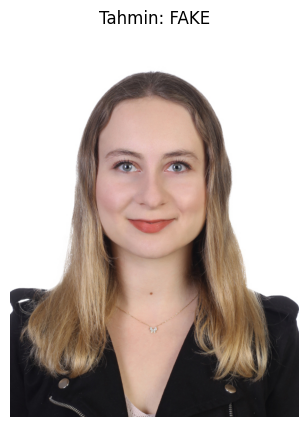

In [1]:
from google.colab import files
from fastai.vision.all import *

# Görsel yükle
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Modeli yükle
learn = load_learner("/content/drive/MyDrive/MyDrive colab_cifake/resnet18-benchmark.pkl")

# Görseli oluştur
img = PILImage.create(img_path)

# Tahmin yap
pred_class, pred_idx, outputs = learn.predict(img)

# Sonuçları göster
print(f"🧠 Tahmin Edilen Sınıf: {pred_class}")
print(f"📊 Olasılıklar: {dict(zip(learn.dls.vocab, map(float, outputs)))}")

# Görseli çiz
img.show(figsize=(5,5))
plt.title(f"Tahmin: {pred_class}")
plt.show()


In [6]:
!pip install duckduckgo-search

from duckduckgo_search import DDGS
import os, io, hashlib, requests, time
from PIL import Image

# 🔖 Etiket başlıkları
classes = {
    "FAKE": [
        "stylegan face",
        "thispersondoesnotexist face",
        "AI generated portrait photo",
        "artificial intelligence human face",
        "midjourney face portrait"
    ],
    "REAL": [
        "passport photo of real person",
        "professional corporate headshot",
        "real human face photo",
        "linkedin profile photo",
        "school yearbook portrait"
    ]
}

# 📁 Hedef klasör
base_folder = "/content/drive/MyDrive/ai_vs_real_dataset"

def search_images(term, max_images=20):
    print(f"\n🔍 Searching: {term}")
    with DDGS() as ddgs:
        try:
            results = ddgs.images(keywords=term)
            return [item["image"] for item in results][:max_images]
        except Exception as e:
            print(f"⚠️ Arama başarısız: {term} | Hata: {e}")
            return []

def download_images(keyword, folder_path, max_images=20):
    urls = search_images(keyword, max_images)
    os.makedirs(folder_path, exist_ok=True)
    print(f"📥 {len(urls)} görsel indiriliyor → {folder_path}")

    for i, url in enumerate(urls):
        try:
            img_data = requests.get(url, timeout=5).content
            img = Image.open(io.BytesIO(img_data))
            img.verify()
            hash_digest = hashlib.sha256(img_data).hexdigest()
            filename = f"{hash_digest[:10]}.jpg"
            path = os.path.join(folder_path, filename)
            if not os.path.exists(path):
                with open(path, "wb") as f:
                    f.write(img_data)
        except Exception as e:
            print(f"⛔ Hatalı görsel atlandı: {e}")
            continue

# 🚀 İndirme döngüsü (sınıf → sorgu → klasör)
for label, queries in classes.items():
    print(f"\n=== 📂 Kategori: {label} ===")
    target_folder = os.path.join(base_folder, label)

    for query in queries:
        print(f"➡️ Sorgu: {query}")
        download_images(query, target_folder, max_images=20)
        print("⏳ Bekleniyor (rate-limit için)...")
        time.sleep(5)



=== 📂 Kategori: FAKE ===
➡️ Sorgu: stylegan face

🔍 Searching: stylegan face
📥 20 görsel indiriliyor → /content/drive/MyDrive/ai_vs_real_dataset/FAKE
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce9009ca430>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce917dd1170>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce917dd0b30>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce9009c9670>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce917dd0b30>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce912231300>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce912231300>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce9009c8040>
⛔ Hatalı görsel atlandı: cannot identify image file <_io.BytesIO object at 0x7ce9009c8040>
⛔ Hatalı görsel atlandı: canno

In [9]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.listdir("/content/drive/MyDrive/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['MyDrive colab_cifake',
 'Irmak Orhan ',
 'Document (14).docx',
 'Özgeçmiş.gdoc',
 'IRMAK ORHAN CV (1) (2).pdf',
 'IRMAK ORHAN CV (1) (1).pdf',
 'IRMAK ORHAN CV (1).pdf',
 'Başlıksız form (1).gform',
 'Başlıksız form.gform',
 'Engr',
 'cmpe421',
 'CV',
 'Coursera',
 'Neural',
 'Ideathon',
 'Coursera Unsupervised',
 'Java',
 'Exploratory Data',
 'justiwise',
 'Customer Credit Analysis',
 'HYPOTHESIS TEST',
 'Colab Notebooks',
 'Web',
 'Cmpe316',
 'Saved from the Google app',
 'documento.pdf',
 'Erasmus+ Food Application',
 'colab_cifake',
 'Google AI Studio',
 'ai_vs_real_dataset']

❌ FAKE için kaynak klasör bulunamadı: /content/drive/MyDrive/447_dataset/FAKE
❌ REAL için kaynak klasör bulunamadı: /content/drive/MyDrive/447_dataset/REAL


In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


os.path.exists("/content/drive/MyDrive/colab_cifake/archive.zip")


Mounted at /content/drive


True

In [21]:
from pathlib import Path
import shutil

# Doğru yollar
extracted_path = Path("/content/extracted_dataset_force/train")
target_path = Path("/content/drive/MyDrive/ai_vs_real_dataset")

# FAKE ve REAL klasörlerini hedefe kopyala
for label in ['FAKE', 'REAL']:
    src = extracted_path / label
    dst = target_path / label

    if src.exists():
        print(f"📦 {label} kopyalanıyor...")
        for file in src.glob("*"):
            target_file = dst / file.name
            if not target_file.exists():
                shutil.copy(file, target_file)
    else:
        print(f"❌ {label} bulunamadı.")


📦 FAKE kopyalanıyor...
📦 REAL kopyalanıyor...


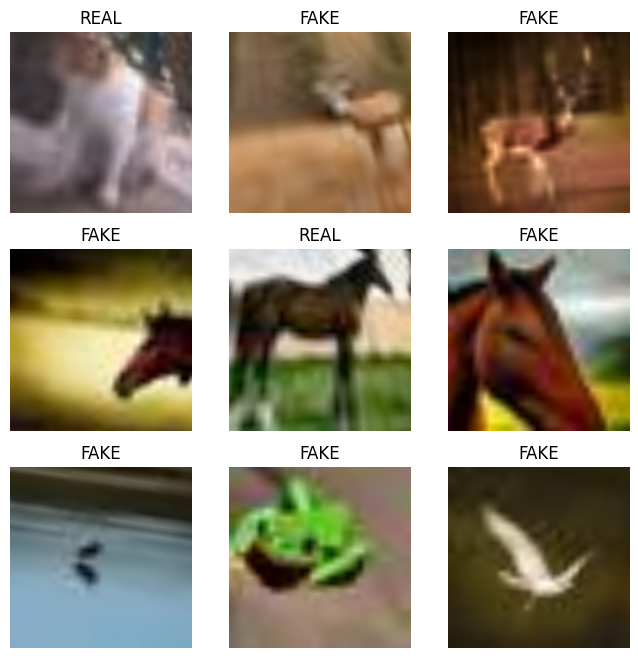

In [3]:
from fastai.vision.all import *

data_path = Path("/content/drive/MyDrive/ai_vs_real_dataset")

dls = ImageDataLoaders.from_folder(
    data_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(mult=1.0),
    bs=32
)

dls.show_batch(max_n=9, figsize=(8, 8))



In [4]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(epochs=4, base_lr=2e-3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 184MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.254163,0.237608,0.903273,1:26:00


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.181393,0.113709,0.957730,02:32
1,0.112970,0.087164,0.969799,02:33
2,0.071784,0.060719,0.978806,02:34
3,0.043595,0.050586,0.981396,02:35


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

In [5]:
# ✅ Eğitilen modeli kalıcı olarak kaydet (.pkl formatı)
learn.export("/content/drive/MyDrive/colab_cifake/final_model.pkl")
print("✅ Model başarıyla kaydedildi: final_model.pkl")

✅ Model başarıyla kaydedildi: final_model.pkl


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


Valley LR: 0.0014454397605732083


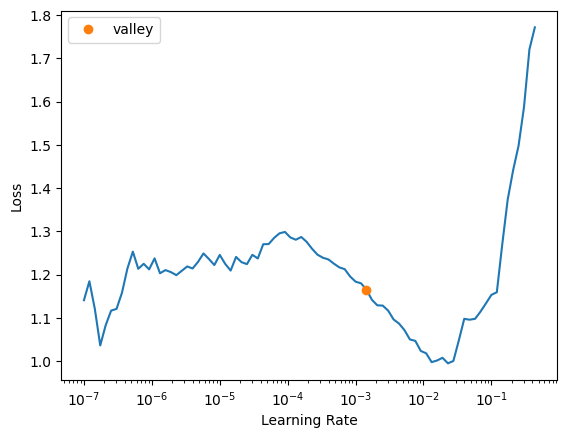

In [6]:
from fastai.vision.all import *
from fastai.callback.fp16 import *

learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
lr_valley = learn.lr_find().valley
print(f"Valley LR: {lr_valley}")


✅ Dosya gerçekten var.


📂 Klasördeki dosyalar:

• data
• archive.zip
• archive (1).zip
